# Visualize the Frequencies of Parts of Speech for Top 5 Subreddit Submissions

This script will utilize Natural Language Processing to visualize the Parts of Speech of the top 5 subreddits' submission titles.

In [1]:
import gzip
import json
import nltk
from csv import DictReader
import matplotlib.pyplot as plt
from collections import defaultdict
from nltk.tokenize import word_tokenize

In [2]:
# Download a few needed packages for the nltk 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/dwolfson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dwolfson/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
data = []

In [4]:
# Open and store each post as a list of dict elements
with gzip.open('../data/top_posts.csv.gz', 'rt') as file:
    csv_reader = DictReader(file)
    
    for row in csv_reader:
        data.append(row)

In [5]:
# Open and store the top subreddits (pre-sorted) as a list
with open('../data/top_subreddits.json', 'r') as file:
    top_subreddits = json.loads(file.read())
    top_subreddits = list(top_subreddits.keys())
    top_subreddits = top_subreddits[:5]

In [6]:
# Maps a subreddit to all of its top posts' titles concatenated together 
titles = defaultdict(str)

# Maps a subreddit the frequencies of each Part of Speech
frequencies = defaultdict(lambda: defaultdict(int))

In [7]:
for datum in data:
    # Edge Case: Skip posts that are no in the top 5 subreddits
    if datum['subreddit'] not in top_subreddits:
        continue
    
    titles[datum['subreddit']] += datum['title'] + " "

In [8]:
# Setup the strings to be used in NLP
for subreddit in top_subreddits:
    # Tokenize Each Word
    words = word_tokenize(titles[subreddit])
    
    # Turns each word into a tuple with its value and Part of Speech
    parts_of_speech = nltk.pos_tag(words)
    
    # Count the frequencies of each Part of Speech generalizing to 7 categories
    for pair in parts_of_speech:
        if pair[1].startswith("JJ"):
            frequencies[subreddit]["Adjectives"] += 1
        elif pair[1].startswith("NN"):
            frequencies[subreddit]["Nouns"] += 1
        elif pair[1].startswith("RB"):
            frequencies[subreddit]["Adverbs"] += 1
        elif pair[1].startswith("PRP"):
            frequencies[subreddit]["Pronouns"] += 1
        elif pair[1].startswith("VB"):
                frequencies[subreddit]["Verbs"] += 1
        elif pair[1].startswith("DT"):
            frequencies[subreddit]["Determiners"] += 1
        else:
            frequencies[subreddit]["Others"] += 1
    
    # Sort the frequencies
    frequencies[subreddit] = dict(sorted(frequencies[subreddit].items(), 
                                    key=lambda item: item[1], 
                                    reverse=True
                                ))

In [9]:
# Help function returns the ratios of each value in a list
def get_ratios(values):
    total = sum(values)
    new_values = []
    for value in values:
        new_values.append(value/total)
        
    return new_values

In [10]:
# Get the width of each bar
bar_width = 0.15

# Get the subreddits as a list
subreddits = list(frequencies.keys())

# Store keys in a specific order
keys = ['Nouns', 'Verbs', 'Adjectives', 'Pronouns', 'Adverbs', 'Determiners', 'Others']

# Get the frequencies for each key as a list
reddit1 = get_ratios([frequencies[subreddits[0]][key] for key in keys])
reddit2 = get_ratios([frequencies[subreddits[1]][key] for key in keys])
reddit3 = get_ratios([frequencies[subreddits[2]][key] for key in keys])
reddit4 = get_ratios([frequencies[subreddits[3]][key] for key in keys])
reddit5 = get_ratios([frequencies[subreddits[4]][key] for key in keys])

In [11]:
# Set position of bar on X axis
r1 = range(len(reddit1))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

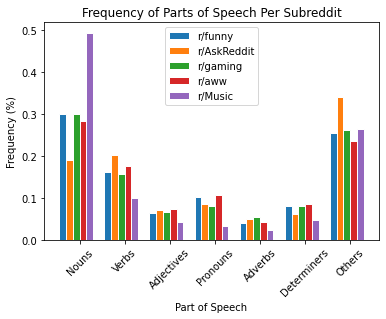

In [12]:
# Make the plot
plt.bar(r1, reddit1, width=bar_width, edgecolor='white', label=f"r/{subreddits[0]}")
plt.bar(r2, reddit2, width=bar_width, edgecolor='white', label=f"r/{subreddits[1]}")
plt.bar(r3, reddit3, width=bar_width, edgecolor='white', label=f"r/{subreddits[2]}")
plt.bar(r4, reddit4, width=bar_width, edgecolor='white', label=f"r/{subreddits[3]}")
plt.bar(r5, reddit5, width=bar_width, edgecolor='white', label=f"r/{subreddits[4]}")

plt.xticks([r + ((len(subreddits)*bar_width)/2) for r in range(len(keys))], keys, rotation=45)

# Title and labels
plt.title('Frequency of Parts of Speech Per Subreddit')
plt.ylabel('Frequency (%)')
plt.xlabel('Part of Speech')
 
# Create legend & Show graphic
plt.legend()
plt.savefig(
    "../images/pos_frequencies.png",
    transparent=True,
    dpi=300,
    bbox_inches='tight'
)
plt.show()